In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
import os

base_dir = os.getcwd()
dataset_path = os.path.join(base_dir, 'Dataset', 'Healthy_Unhealthy')

dataset = tf.keras.preprocessing.image_dataset_from_directory( # Generates a tf.data.Dataset from image files in a directory.
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6130 files belonging to 2 classes.


In [25]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
class_names = dataset.class_names
class_names

['Healthy', 'Unhealthy']

In [27]:
len(dataset) # This is 18 because each element in the tf dataset is a batch [32 * 18 = 576]

192

In [28]:
# Printing the images of with respect to each batch and with each and every pixel of an image in a batch (Hex values)
for data in dataset:
  print(data)

2023-05-06 06:34:37.031982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]
2023-05-06 06:34:37.032515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6130]
	 [[{{node Placeholder/_0}}]]


(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[2.08000000e+02, 2.03000000e+02, 2.00000000e+02],
         [2.07785721e+02, 2.02785721e+02, 1.99785721e+02],
         [2.07000000e+02, 2.02000000e+02, 1.99000000e+02],
         ...,
         [2.32403046e+02, 2.27403046e+02, 2.23403046e+02],
         [2.31229584e+02, 2.26229584e+02, 2.22229584e+02],
         [2.30137741e+02, 2.25137741e+02, 2.21137741e+02]],

        [[2.08000000e+02, 2.03000000e+02, 2.00000000e+02],
         [2.07785721e+02, 2.02785721e+02, 1.99785721e+02],
         [2.07000000e+02, 2.02000000e+02, 1.99000000e+02],
         ...,
         [2.33076523e+02, 2.28076523e+02, 2.24076523e+02],
         [2.31765289e+02, 2.26765289e+02, 2.22765289e+02],
         [2.31229584e+02, 2.26229584e+02, 2.22229584e+02]],

        [[2.08000000e+02, 2.03000000e+02, 2.00000000e+02],
         [2.07785721e+02, 2.02785721e+02, 1.99785721e+02],
         [2.07000000e+02, 2.02000000e+02, 1.99000000e+02],
         ...,
         

2023-05-06 06:34:42.866437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]
2023-05-06 06:34:42.866797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]


(32, 224, 224, 3)
[0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0]
(224, 224, 3)


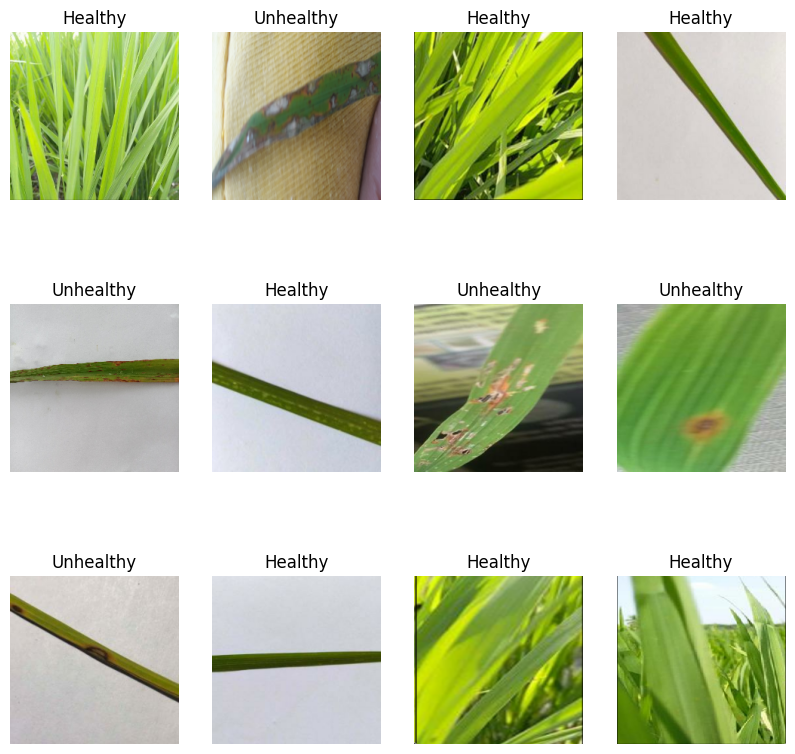

In [29]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1): # Gives only 1 batch
  print(image_batch.shape),
  print(label_batch.numpy()),
  print(image_batch[0].shape), # shape of first image in the batch
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8")) # without mentioning "astype("unit8")" it assumes float value
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

# Splitting Dataset

80% ==> training
20% ==> 10% validation, 10% test

In [30]:
len(dataset)

192

In [31]:
train_size = 0.8
len(dataset)*train_size # 80% of dataset i.e. 80% of 18 = 14.44

153.60000000000002

In [32]:
train_ds = dataset.take(14) # similar to train_test_split of sklearn
len(train_ds)

14

In [33]:
test_ds = dataset.skip(14) #start after 14 i.e 14 to 18 for test and validation set [Temp test Dataset]
len(test_ds) 

178

In [34]:
val_size = 0.1
len(dataset)*val_size

19.200000000000003

In [35]:
val_ds = test_ds.take(2) # validation Dataset
len(val_ds)

2

In [36]:
test_ds = test_ds.skip(2) # Actual Test Dataset
len(test_ds)

176

In [37]:
#same thing as before but in one function
def get_dataset_partitions_tf(ds, train_split =0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=500):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [38]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [39]:
print(len(train_ds), len(val_ds), len(test_ds))

153 19 20


In [40]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE) # Let tensorflow decide the number of batches to be used for loading
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE) # Let tensorflow decide the number of batches to be used for loading
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE) # Let tensorflow decide the number of batches to be used for loading

Pre Processing Pipeline, Scaling etc

In [88]:
# Pre Processing Pipeline, Scaling etc
# One layer called resize_and_rescale layer
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [89]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

Model Building:

In [96]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), # 2D Convolutional layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Dense Layer of 64 Neurons
    layers.Dense(5, activation='softmax') # softmax:Normalise probablity of classes (4 classes)
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (32, 111, 111, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 54, 54, 64)         0         
 g2D)                                                 

Compiling Model
Optimizer = adam

SparseCategoricalCrossentropy for losses

accuracy as a metric

In [98]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [99]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
153/153 [==============================] - 12s 62ms/step - loss: 0.7123 - accuracy: 0.5496 - val_loss: 0.7415 - val_accuracy: 0.5757
Epoch 2/50
153/153 [==============================] - 9s 62ms/step - loss: 0.5683 - accuracy: 0.6780 - val_loss: 0.5289 - val_accuracy: 0.7582
Epoch 3/50
153/153 [==============================] - 9s 61ms/step - loss: 0.4875 - accuracy: 0.7440 - val_loss: 0.4454 - val_accuracy: 0.7829
Epoch 4/50
153/153 [==============================] - 9s 62ms/step - loss: 0.4263 - accuracy: 0.7915 - val_loss: 0.3769 - val_accuracy: 0.8191
Epoch 5/50
153/153 [==============================] - 9s 62ms/step - loss: 0.3893 - accuracy: 0.8073 - val_loss: 0.3389 - val_accuracy: 0.8602
Epoch 6/50
153/153 [==============================] - 9s 62ms/step - loss: 0.3530 - accuracy: 0.8314 - val_loss: 0.3306 - val_accuracy: 0.8470
Epoch 7/50
153/153 [==============================] - 9s 61ms/step - loss: 0.3196 - accuracy: 0.8503 - val_loss: 0.2802 - val_accuracy: 0.886

In [100]:
scores = model.evaluate(test_ds)

2023-04-17 01:42:19.465968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]
2023-04-17 01:42:19.466673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]


20/20 [==============================] - 7s 20ms/step - loss: 0.1374 - accuracy: 0.9484


Plotting/Analysing Results

In [101]:
print(history.params)
history.history.keys()

{'verbose': 1, 'epochs': 50, 'steps': 153}


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

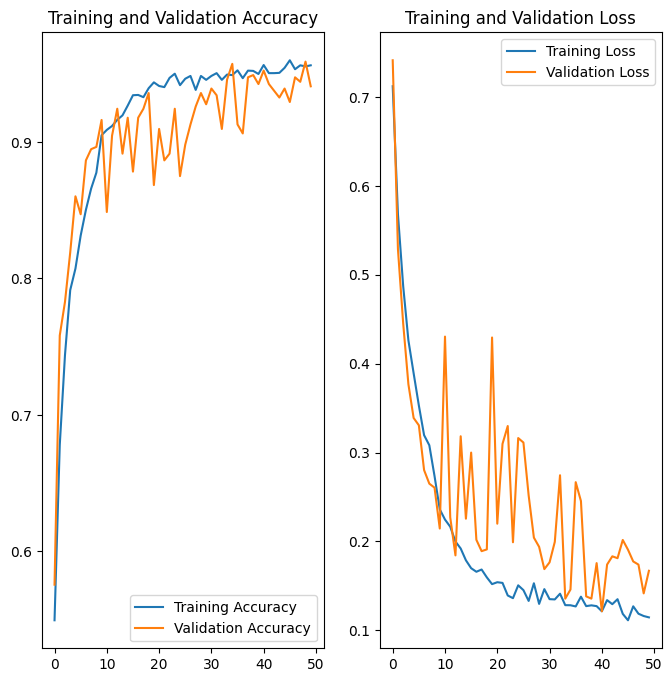

In [103]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 25ms/step


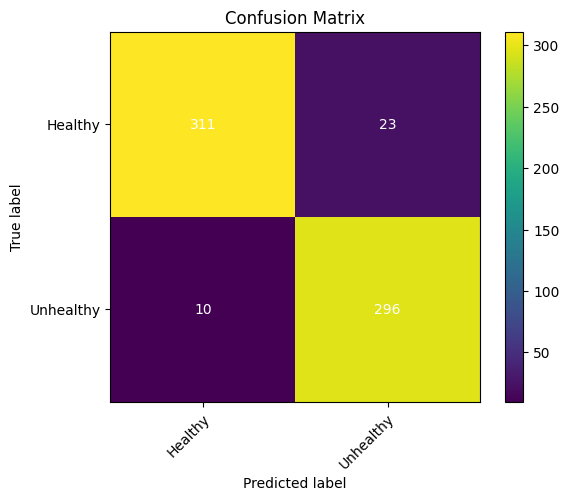

In [104]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# model = tf.keras.models.load_model('/home/sharan/Documents/Final_Year_Project/models/healthy_unhealthy_model.h5')

# Define a function to get the predicted labels for a given set of images
def get_predicted_labels(model, images):
    predicted_probs = model.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    return predicted_labels

# Get the true labels and predicted labels for all the images in the test dataset
test_labels = []
predicted_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())
    predicted_labels.extend(get_predicted_labels(model, images))

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)

# Define the class names
# class_names = ['Healthy', 'Unhealthy']

# Create the table plot
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix)

# Set the table labels and colorbar
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)

# Set the table title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Show the plot
plt.show()


In [43]:
import numpy as np
import sklearn.metrics as metrics
import tensorflow as tf

model = tf.keras.models.load_model('/home/sharan/Documents/Final_Year_Project/models/healthy_unhealthy_41_Epochs.h5')

# Define a function to get the predicted labels for a given set of images
def get_predicted_labels(model, images):
    predicted_probs = model.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    return predicted_labels

# Get the true labels and predicted labels for all the images in the test dataset
test_labels = []
predicted_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())
    predicted_labels.extend(get_predicted_labels(model, images))

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)

# Calculate the performance metrics
tn, fp, fn, tp = confusion_matrix.ravel()
positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
misclassification_rate = 1 - accuracy

# Print the performance metrics
print(f"Positive Rate: {positive_rate:.2f}")
print(f"True Negative Rate: {true_negative_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"False Negative Rate: {false_negative_rate:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")


2023-04-18 03:51:15.501678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6130]
	 [[{{node Placeholder/_0}}]]
2023-04-18 03:51:15.502079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6130]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 24ms/step
Positive Rate: 0.96
True Negative Rate: 0.92
False Positive Rate: 0.08
False Negative Rate: 0.04
Accuracy: 0.94
Precision: 0.94
Recall: 0.96
Misclassification Rate: 0.06


In [41]:
import numpy as np
import sklearn.metrics as metrics
import tensorflow as tf

model = tf.keras.models.load_model('/home/sharan/Documents/Final_Year_Project/models/healthy_unhealthy_50_Epochs.h5')

# Define a function to get the predicted labels for a given set of images
def get_predicted_labels(model, images):
    predicted_probs = model.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    return predicted_labels

# Get the true labels and predicted labels for all the images in the test dataset
test_labels = []
predicted_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())
    predicted_labels.extend(get_predicted_labels(model, images))

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)

# Calculate the performance metrics
tn, fp, fn, tp = confusion_matrix.ravel()
positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
accuracy = metrics.accuracy_score(test_labels, predicted_labels)
precision = metrics.precision_score(test_labels, predicted_labels)
recall = metrics.recall_score(test_labels, predicted_labels)
misclassification_rate = 1 - accuracy

# Print the performance metrics
print(f"Positive Rate: {positive_rate:.2f}")
print(f"True Negative Rate: {true_negative_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"False Negative Rate: {false_negative_rate:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")


2023-05-06 06:34:57.131482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6130]
	 [[{{node Placeholder/_0}}]]
2023-05-06 06:34:57.131842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 201ms/step
Positive Rate: 0.96
True Negative Rate: 0.94
False Positive Rate: 0.06
False Negative Rate: 0.04
Accuracy: 0.95
Precision: 0.94
Recall: 0.96
Misclassification Rate: 0.05


In [21]:
import numpy as np
import sklearn.metrics as metrics
import tensorflow as tf

model = tf.keras.models.load_model('/home/sharan/Documents/Final_Year_Project/models/5.h5')

# Define a function to get the predicted labels for a given set of images
def get_predicted_labels(model, images):
    predicted_probs = model.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    return predicted_labels

# Get the true labels and predicted labels for all the images in the test dataset
test_labels = []
predicted_labels = []
for images, labels in test_ds:
    test_labels.extend(labels.numpy())
    predicted_labels.extend(get_predicted_labels(model, images))

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)

# Calculate the performance metrics for each class
num_classes = confusion_matrix.shape[0]
positive_rates = []
true_negative_rates = []
false_positive_rates = []
false_negative_rates = []
accuracies = []
precisions = []
recalls = []
misclassification_rates = []

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = np.sum(confusion_matrix[:, i]) - tp
    fn = np.sum(confusion_matrix[i, :]) - tp
    tn = np.sum(confusion_matrix) - tp - fp - fn
    
    positive_rate = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    accuracy = metrics.accuracy_score(test_labels, predicted_labels)
    precision = metrics.precision_score(test_labels, predicted_labels, average='weighted', zero_division=0)
    recall = metrics.recall_score(test_labels, predicted_labels, average='weighted')
    misclassification_rate = 1 - accuracy
    
    positive_rates.append(positive_rate)
    true_negative_rates.append(true_negative_rate)
    false_positive_rates.append(false_positive_rate)
    false_negative_rates.append(false_negative_rate)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    misclassification_rates.append(misclassification_rate)

# Print the performance metrics for each class
for i in range(num_classes):
    print(f"Metrics for class {i}:")
    print(f"Positive Rate: {positive_rates[i]:.2f}")
    print(f"True Negative Rate: {true_negative_rates[i]:.2f}")
    print(f"False Positive Rate: {false_positive_rates[i]:.2f}")
    print(f"False Negative Rate: {false_negative_rates[i]:.2f}")
    print(f"Accuracy: {accuracies[i]:.2f}")
    print(f"Precision: {precisions[i]:.2f}")
    print(f"Recall: {recalls[i]:.2f}")
    print(f"Misclassification Rate: {misclassification_rates[i]:.2f}")
    print()


1/1 [==============================] - 0s 23ms/step
Metrics for class 0:
Positive Rate: 0.97
True Negative Rate: 1.00
False Positive Rate: 0.00
False Negative Rate: 0.03
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Misclassification Rate: 0.01

Metrics for class 1:
Positive Rate: 0.99
True Negative Rate: 1.00
False Positive Rate: 0.00
False Negative Rate: 0.01
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Misclassification Rate: 0.01

Metrics for class 2:
Positive Rate: 1.00
True Negative Rate: 0.99
False Positive Rate: 0.01
False Negative Rate: 0.00
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Misclassification Rate: 0.01

Metrics for class 3:
Positive Rate: 0.99
True Negative Rate: 1.00
False Positive Rate: 0.00
False Negative Rate: 0.01
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Misclassification Rate: 0.01



first image to predict
actual label: Unhealthy
1/1 [==============================] - 0s 24ms/step


2023-04-17 01:42:28.051542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]
2023-04-17 01:42:28.052177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]


[5.0336708e-05 9.9994969e-01 2.6379324e-25 1.8283160e-25 1.6277145e-25]
predicted label: Unhealthy


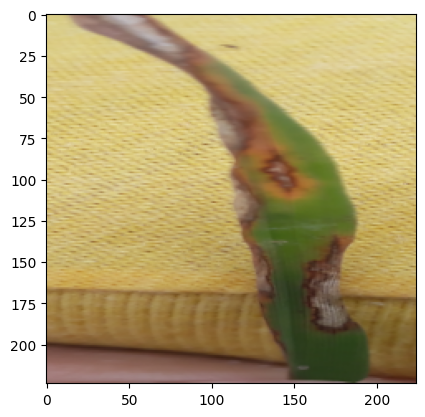

In [105]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch) # Prediction of whole batch
    print(batch_prediction[0]) # Now the predicted class is the element in the array with the highest value, so take numpy.argmax and print the index of the array
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) # Prediction for the first image of the batch. Classname of respective index predicted



In [106]:
# Function that takes model and image as an input and outputs confidence
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions)),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 92ms/step


2023-04-17 01:42:28.434538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]
2023-04-17 01:42:28.435147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [6130]
	 [[{{node Placeholder/_4}}]]


[[[217.14087  206.97122  138.80157 ]
  [217.42259  207.33928  138.25294 ]
  [217.97426  207.83035  138.66072 ]
  ...
  [227.46533  215.9485   155.16965 ]
  [227.02962  214.96112  154.47005 ]
  [223.09026  210.05055  149.70035 ]]

 [[219.27081  207.25294  139.16965 ]
  [218.01785  206.24992  137.50893 ]
  [218.43439  206.49107  137.07724 ]
  ...
  [227.55046  217.53532  156.23488 ]
  [228.2233   218.2233   158.43752 ]
  [228.47322  218.45839  159.76195 ]]

 [[218.40385  205.40385  135.70743 ]
  [217.72011  204.72011  135.02368 ]
  [217.30357  204.30357  134.4784  ]
  ...
  [226.1518   215.30359  150.03949 ]
  [227.8331   217.8331   155.46086 ]
  [228.69643  219.2747   159.80939 ]]

 ...

 [[162.09714  123.79355  121.96319 ]
  [161.39282  122.65756  121.65756 ]
  [160.67336  122.24103  121.112274]
  ...
  [ 78.03952   37.168274  19.600615]
  [ 79.100975  39.85681   21.743855]
  [ 81.56831   43.390766  24.14184 ]]

 [[156.03564  116.035645 114.038666]
  [156.03564  116.035645 114.3034  ]


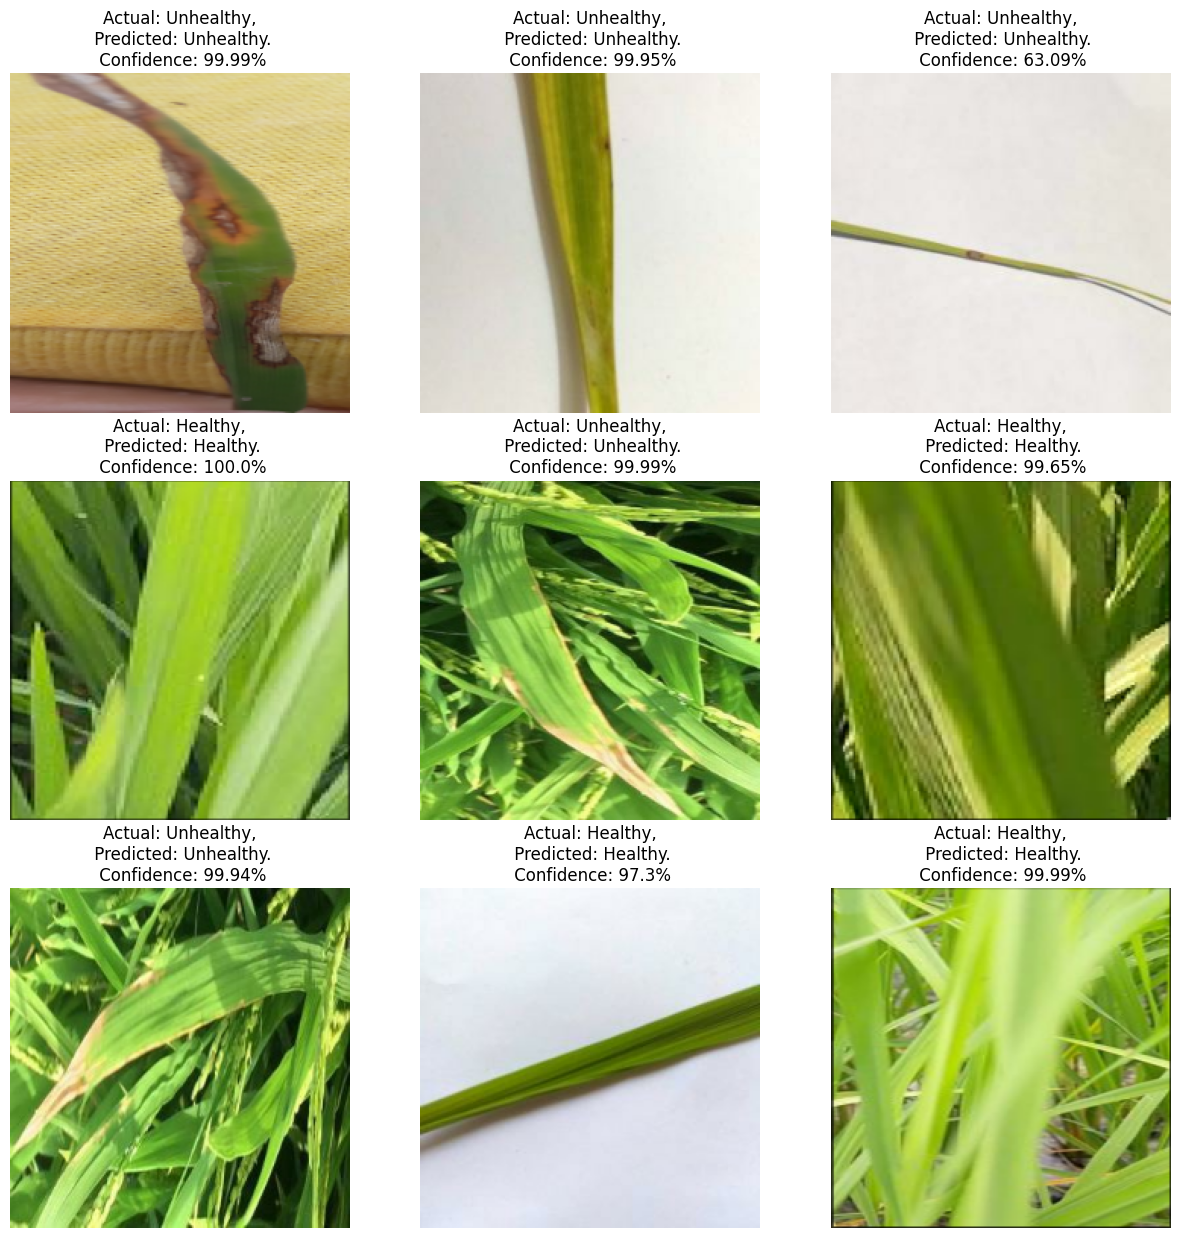

In [107]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        print(images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [4]:
# import os
# model_version = "healthy_unhealthy_50_Epochs.h5"
# base_dir = os.getcwd()
# dataset_path = os.path.join(base_dir, 'models', model_version)
# model.save(dataset_path)